# 泰坦尼克号幸存者预测

## 1、分析需求

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("../input"))

['test.csv', 'train.csv']


In [2]:
data_train = pd.read_csv('../input/train.csv')
data_test = pd.read_csv('../input/test.csv')

In [3]:
data_train.shape, data_test.shape

((891, 12), (418, 11))

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 2、探索性数据分析（EDA）

+ 性别：是离散型变量。

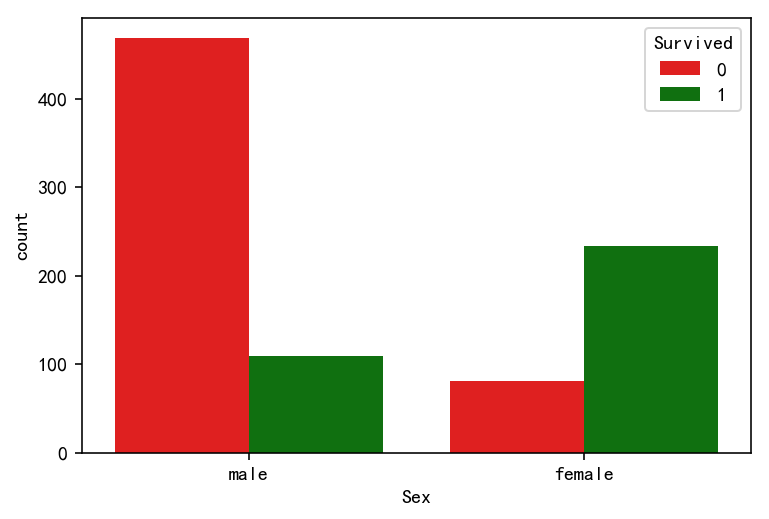

In [11]:
color = {0: 'r', 1: 'g'}
sns.countplot(x='Sex', data=data_train, hue='Survived', palette=color)
plt.show()

下面这一步是创建列联表，然后进行卡方检验，以检测“性别”对“是否幸存”是否有影响，关于卡方检验的知识可以查看我的文章 [白话“卡方检验”](https://www.liwei.party/2019/02/11/machine-learning/chi-square-test/)。

In [12]:
sex_survived_pivot_table = pd.pivot_table(
    data_train,
    index='Sex',
    columns='Survived',
    values='PassengerId',
    aggfunc='count')

sex_survived_pivot_table

Survived,0,1
Sex,,
female,81,233
male,468,109


In [13]:
from scipy.stats import chi2_contingency

chi2_contingency(sex_survived_pivot_table.values)[1]

1.1973570627755645e-58

可以看到 $p$ 值为 $1.1973570627755645e-58$，远小于 $0.05$，因此“性别”和“幸存”的确不是独立的，“性别”是一项预测“是否幸存”的重要特征。

+ Age：连续型变量。

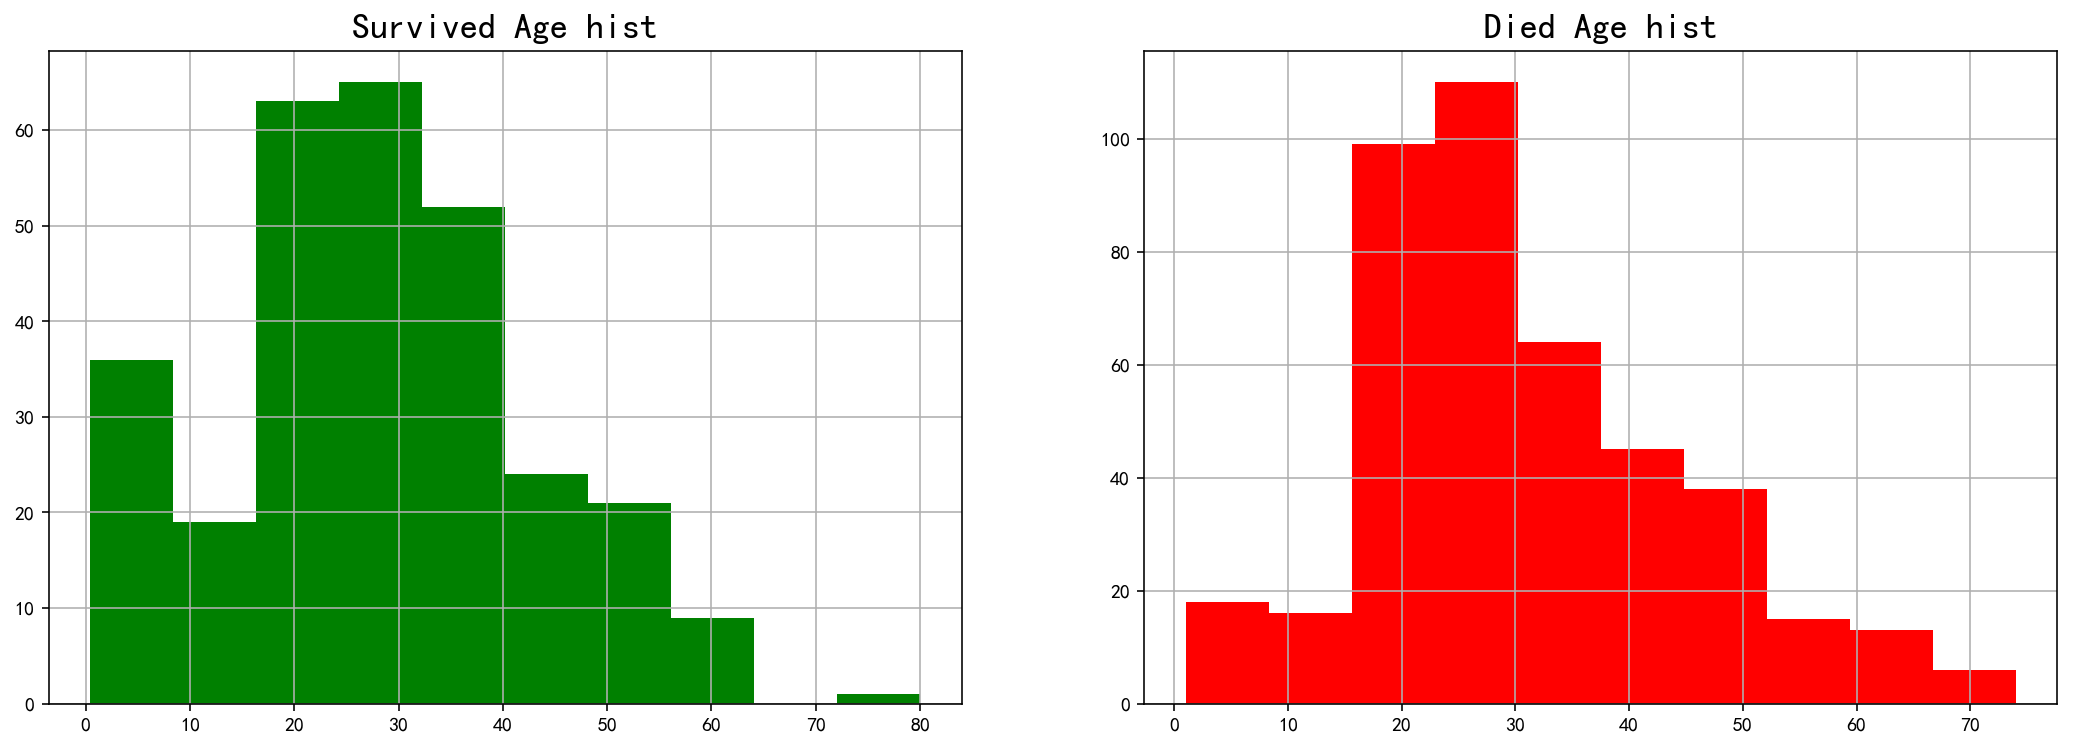

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 6)

data_train[data_train['Survived'] == 1]['Age'].hist(color='g', ax=axes[0])
axes[0].set_title('Survived Age hist', size=18)

data_train[data_train['Survived'] == 0]['Age'].hist(color='r', ax=axes[1])
axes[1].set_title('Died Age hist', size=18)

plt.show()

可以看出，年轻人幸存较多。

+ Fare：票价，连续型变量，可以使用箱线图或者小提琴图看分布。

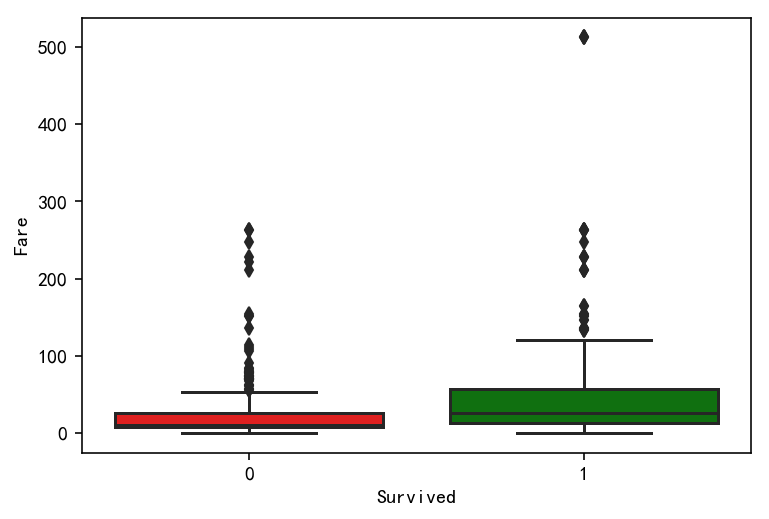

In [15]:
sns.boxplot(x="Survived", y="Fare", data=data_train, palette={0: 'r', 1: 'g'})
plt.show()

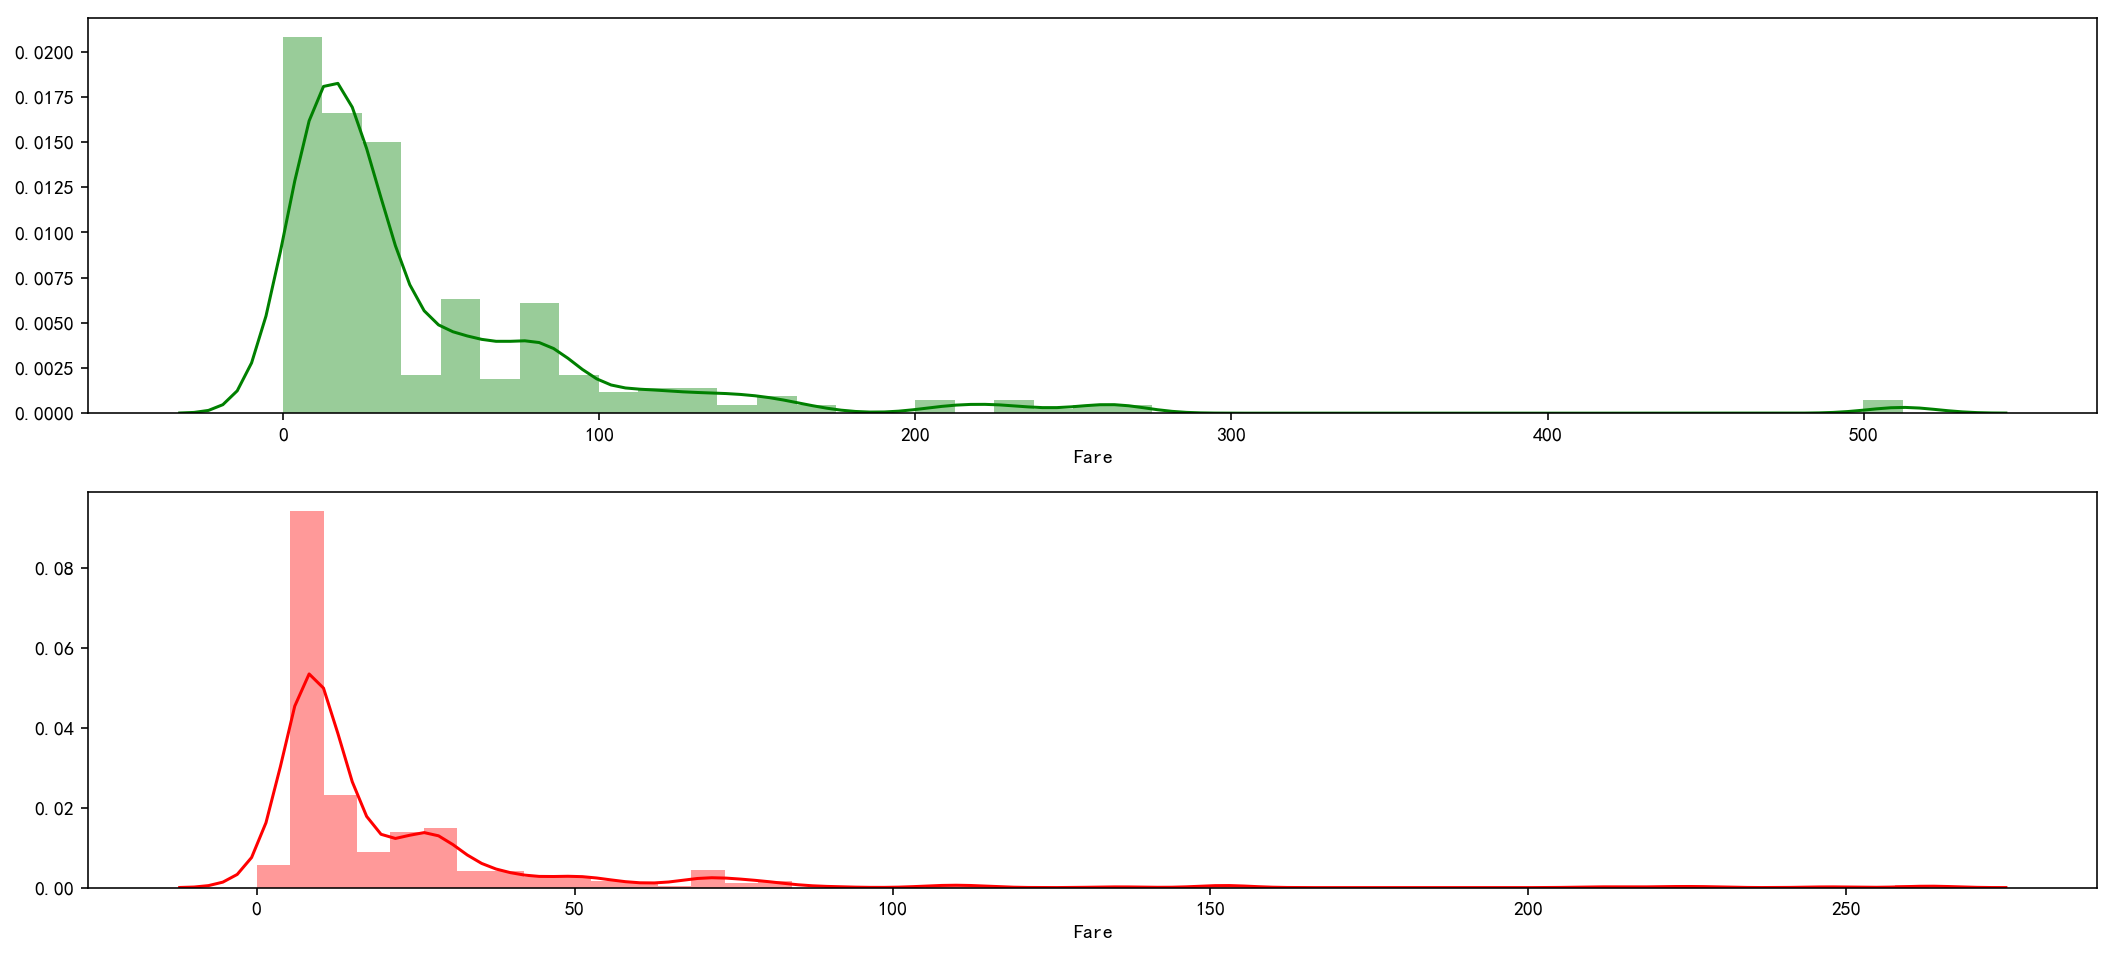

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 8))
sns.distplot(data_train[data_train['Survived'] == 1]['Fare'], color='g', ax=axes[0])
sns.distplot(data_train[data_train['Survived'] == 0]['Fare'], color='r', ax=axes[1])
plt.show()

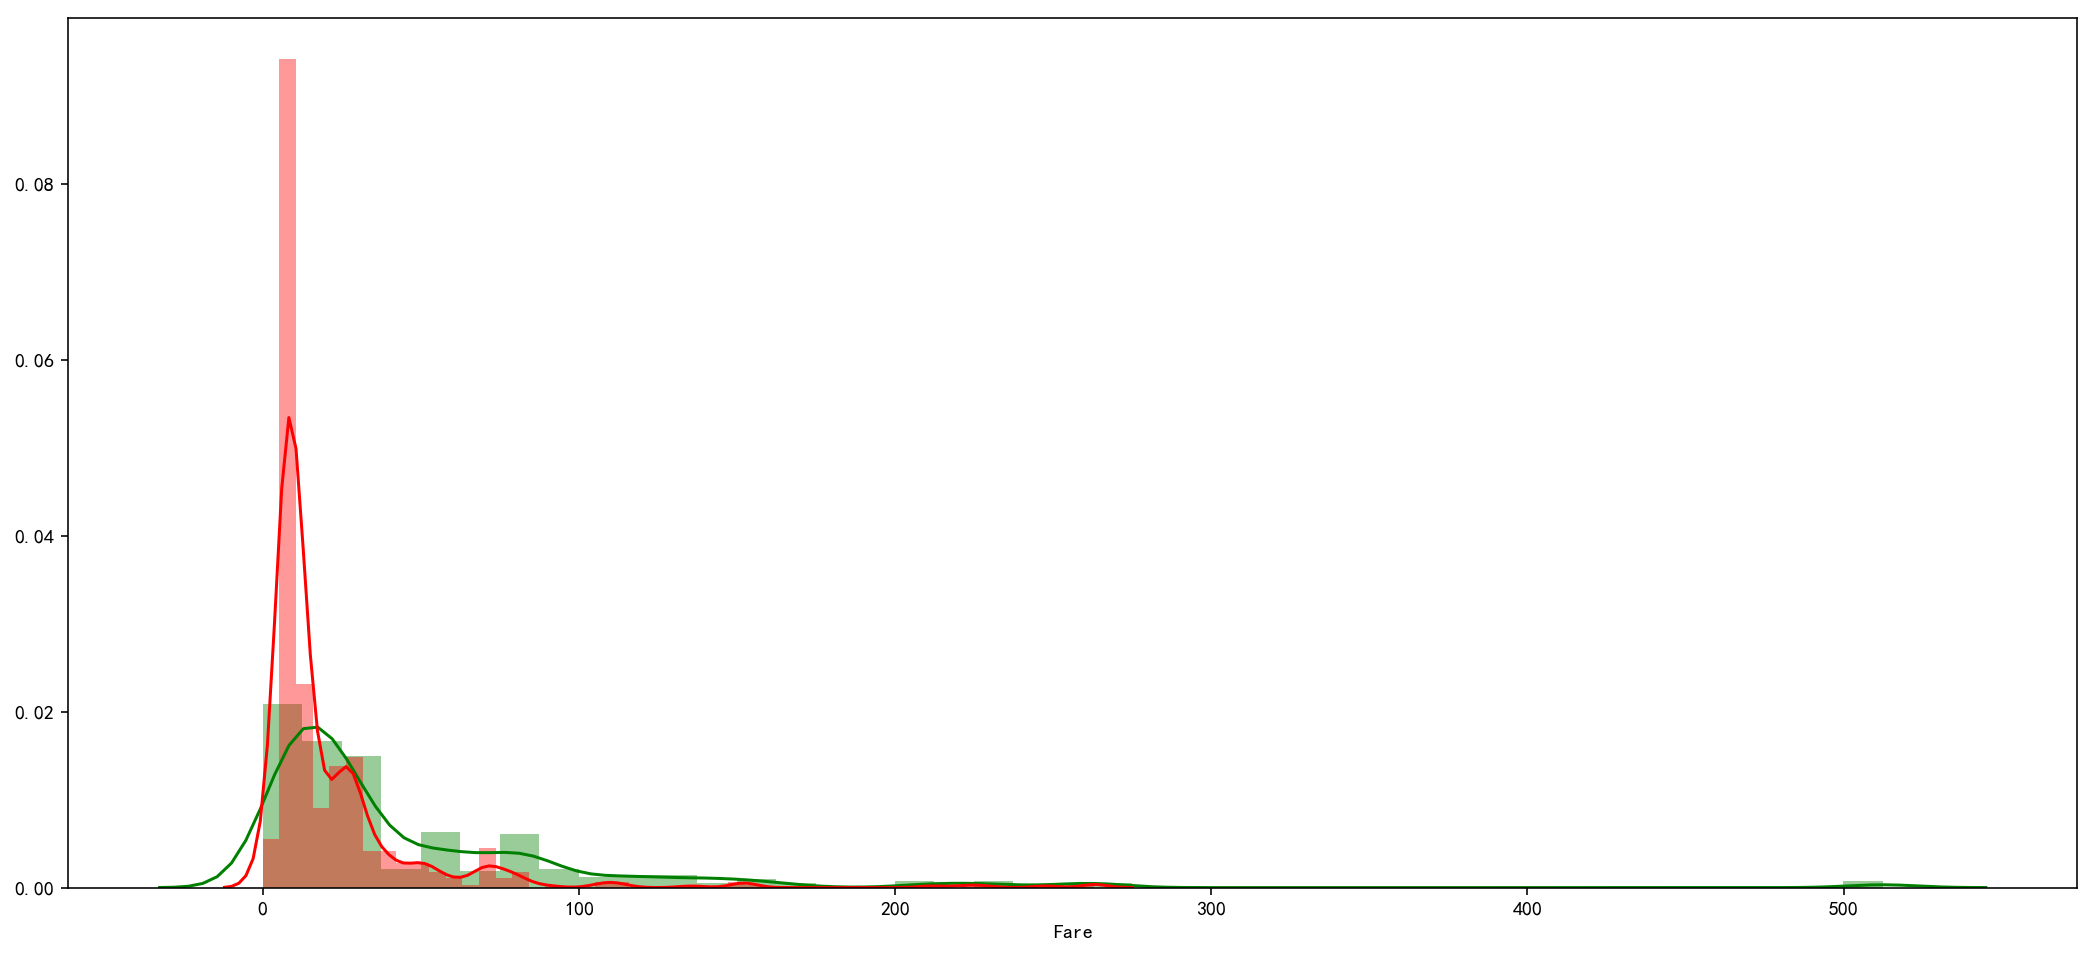

In [17]:
plt.figure(figsize=(18, 8))
sns.distplot(data_train[data_train['Survived'] == 1]['Fare'], color='g')
sns.distplot(data_train[data_train['Survived'] == 0]['Fare'], color='r')
plt.show()

可以看出，票价比较低的，遇难的人数比较多，因此票价是一个重要的特征。

+ Pclass

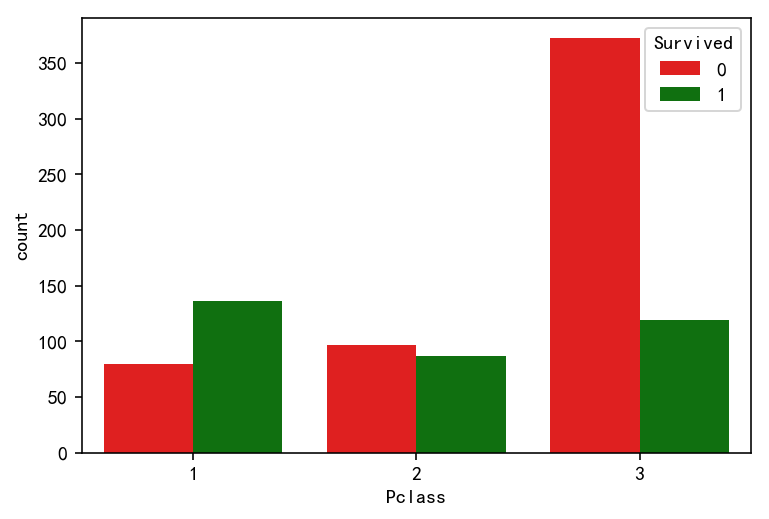

In [18]:
color = {0: 'r', 1: 'g'}

sns.countplot(x='Pclass', hue='Survived', palette=color, data=data_train)
plt.show()

可以看到，$1$ 号乘客等级幸存者较多， $3$ 号乘客等级死亡比幸存多很多，因此乘客等级是一个预测是否幸存的重要变量。下面使用卡方检验，验证我们的想法。

In [19]:
pclass_survived_pivot_table = pd.pivot_table(
    data_train,
    index='Pclass',
    columns='Survived',
    values=['PassengerId'],
    aggfunc='count')
pclass_survived_pivot_table

PassengerId     
Survived           0    1
Pclass                   
1                 80  136
2                 97   87
3                372  119

In [20]:
chi2_contingency(pclass_survived_pivot_table.values)[1]

4.549251711298793e-23

+ Fare

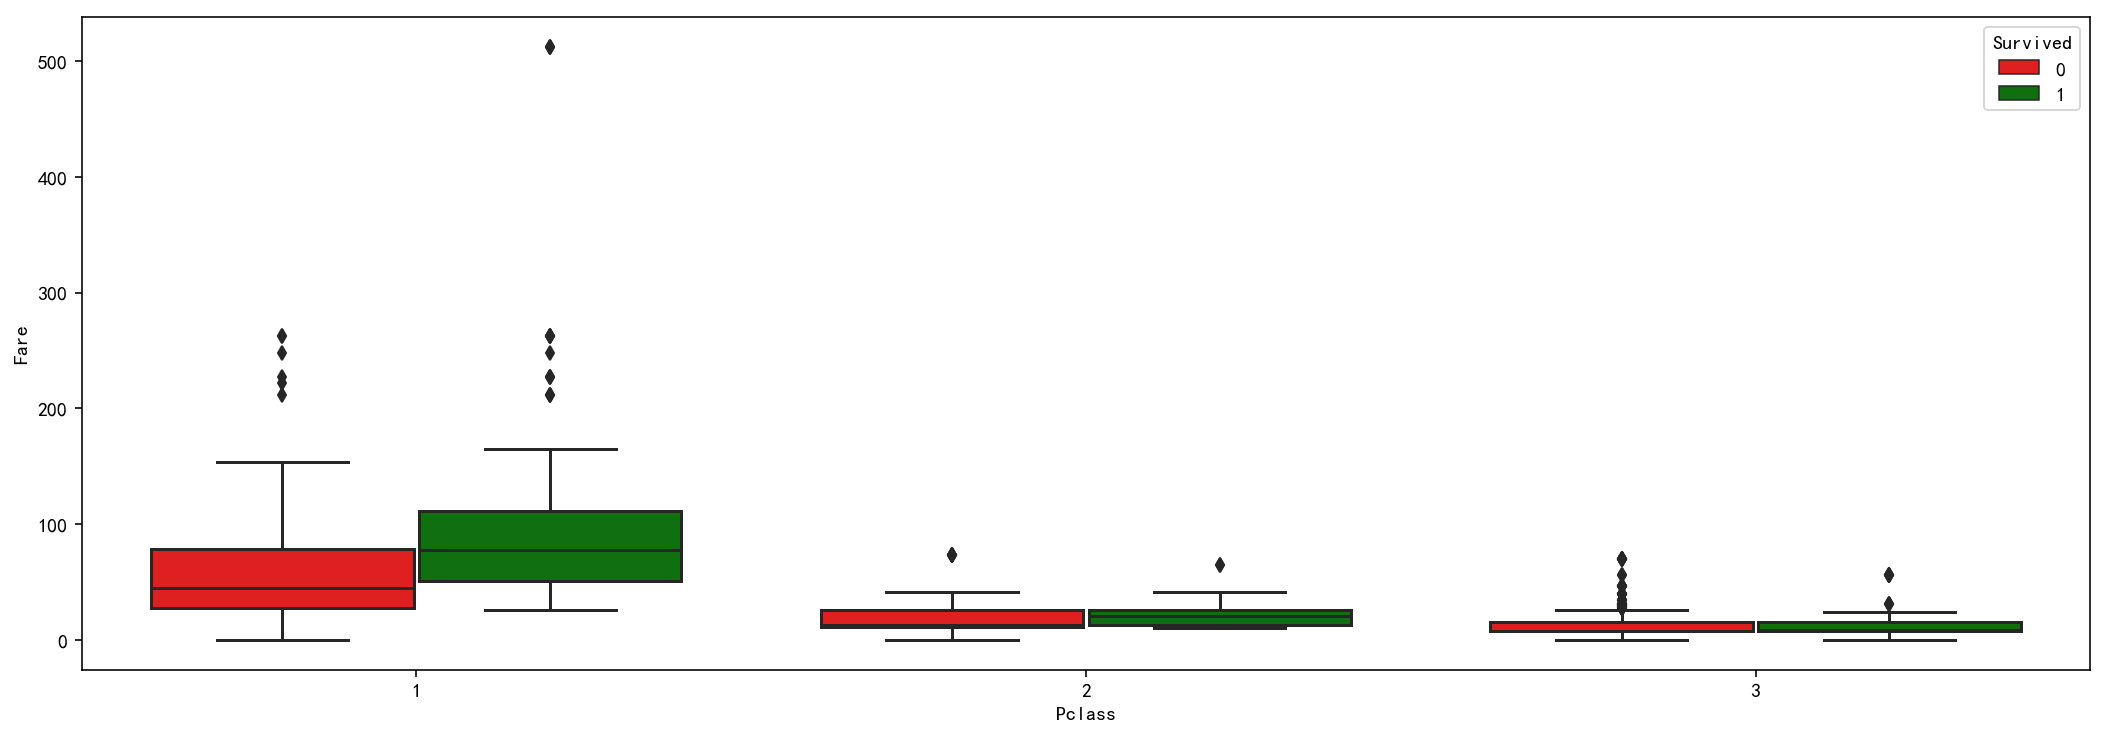

In [21]:
plt.figure(figsize=(18, 6))

sns.boxplot(
    x='Pclass', y='Fare', data=data_train, hue='Survived', palette=color)
plt.show()

乘客等级为 1 的，票价相对较高。

+ Embarked：离散型变量。

In [23]:
data_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

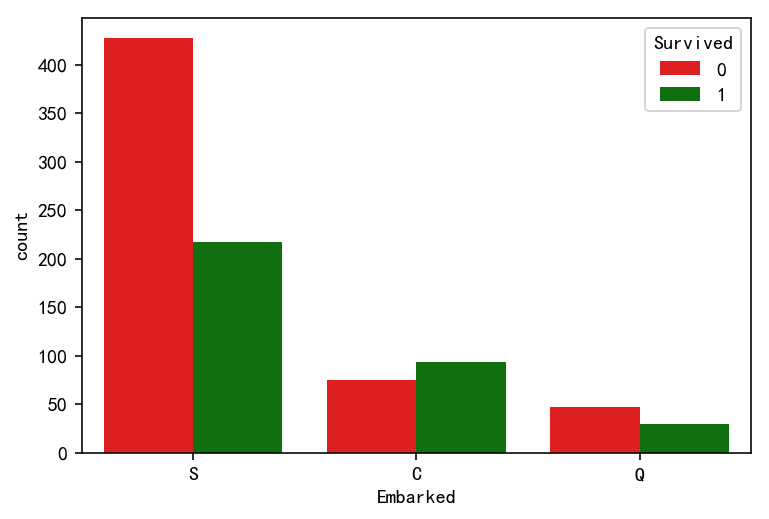

In [24]:
sns.countplot(x='Embarked', hue='Survived', palette=color, data=data_train)
plt.show()

S 登船港口罹难者多，C 登船港口幸存者多。

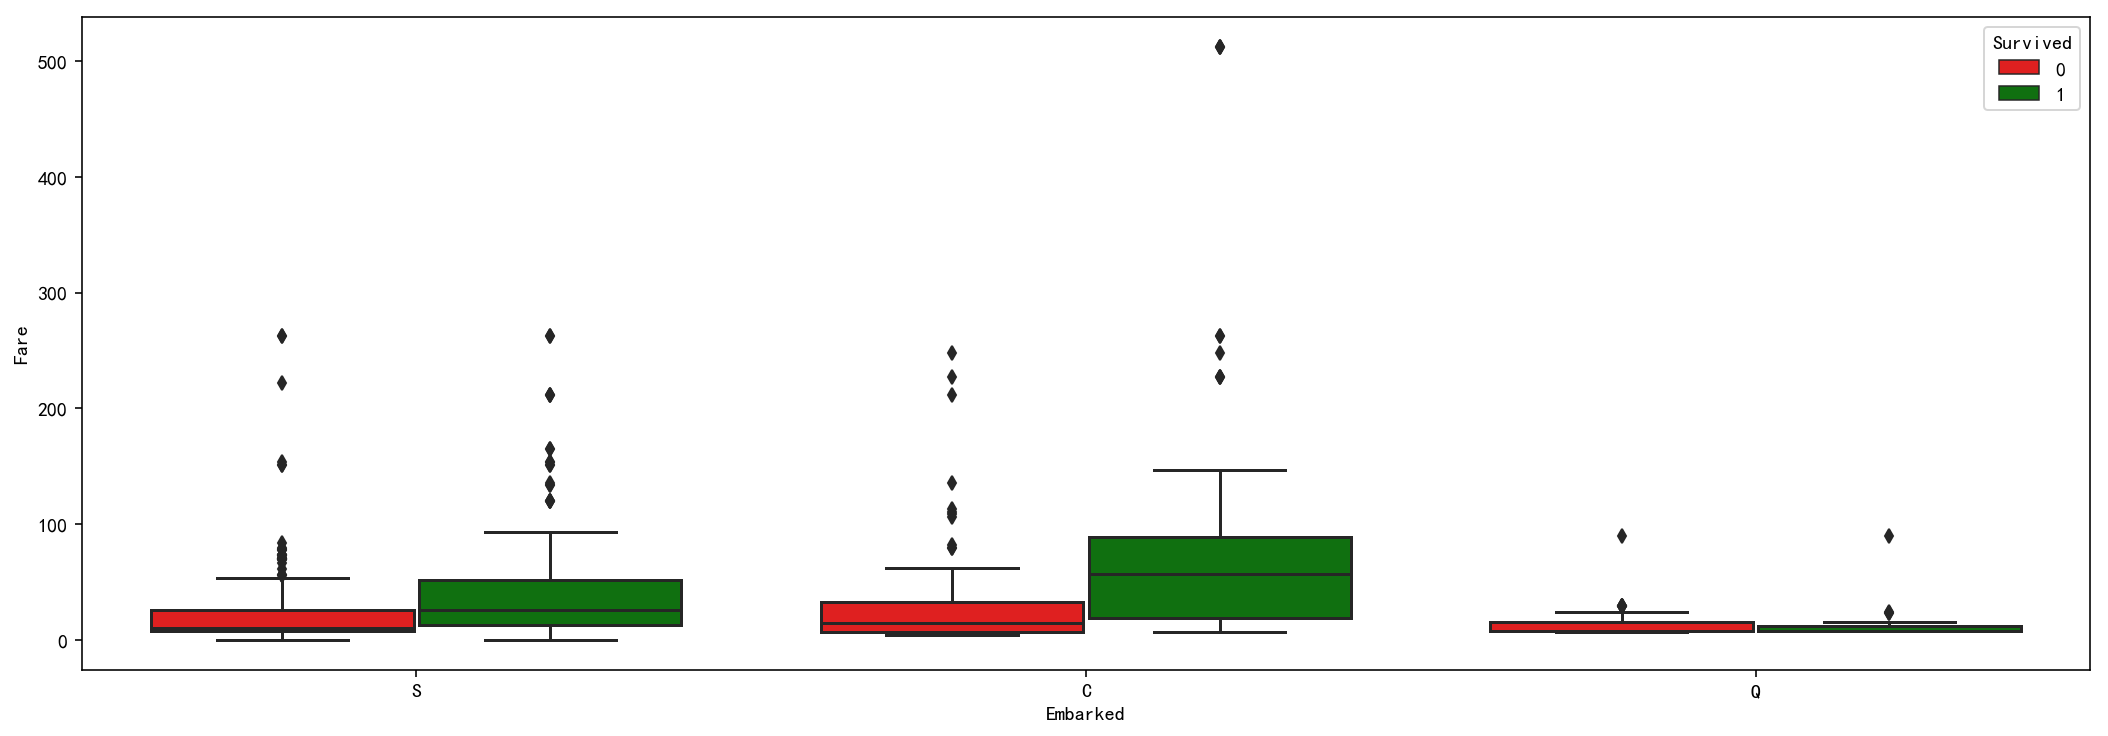

In [25]:
plt.figure(figsize=(18, 6))
sns.boxplot(
    x='Embarked', y='Fare', data=data_train, hue='Survived', palette=color)
plt.show()

In [26]:
embarked_survived_pivot_table = pd.pivot_table(
    data=data_train,
    index='Embarked',
    columns='Survived',
    values='PassengerId',
    aggfunc='count')
embarked_survived_pivot_table

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [27]:
chi2_contingency(embarked_survived_pivot_table.values)[1]

1.769922284120912e-06

## 3、特征工程

In [28]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


把目标变量（target）和 ID 拿出来。

+ 目标变量用于训练数据；
+ ID 用于提交结果时使用。

In [30]:
y = data_train.Survived
PassengerId = data_test.PassengerId
data_train.drop(['Survived'], axis=1, inplace=True)

合在一起，一般不这么做，因为测试数据集很可能是随时来的。

In [31]:
combined = pd.concat([data_train, data_test], sort=False, axis=0)
combined.shape

(1309, 11)

In [32]:
combined.drop(['PassengerId'], inplace=True, axis=1)

In [33]:
combined.shape

(1309, 10)

### 特征抽取

+ 抽取 Title 特征

In [34]:
combined['title'] = combined['Name'].map(
    lambda x: x.split(',')[1].split('.')[0].strip())

In [35]:
combined['title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Ms                2
Mlle              2
Jonkheer          1
Capt              1
Mme               1
Dona              1
the Countess      1
Don               1
Lady              1
Sir               1
Name: title, dtype: int64

In [36]:
# 再根据这些 title 细分，是官员，还是皇室，还是女士、先生、小姐
combined['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [37]:
Title_Dictionary = {
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Don": "Royalty",
    "Rev": "Officer",
    "Dr": "Officer",
    "Mme": "Mrs",
    "Ms": "Mrs",
    "Major": "Officer",
    "Lady": "Royalty",
    "Sir": "Royalty",
    "Mlle": "Miss",
    "Col": "Officer",
    "Capt": "Officer",
    "the Countess": "Royalty",
    "Jonkheer": "Royalty",
    "Dona": 'Mrs'
}

In [38]:
combined['Title'] = combined['title'].map(Title_Dictionary)
combined['Title'].value_counts()

Mr         757
Miss       262
Mrs        201
Master      61
Officer     23
Royalty      5
Name: Title, dtype: int64

In [39]:
del combined['Name']
del combined['title']

In [40]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


+ 抽取家庭规模

In [41]:
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1
combined['FamilySize'].head()

0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64

In [42]:
def deal_with_family_size(num):
    if num == 1:
        return 'Singleton'
    elif num <= 4:
        return 'SmallFamily'
    elif num >= 5:
        return 'LargeFamily'
    return num

combined['FamilySize'] = combined['FamilySize'].map(deal_with_family_size)

### 缺失值填充

+ Age：根据 Sex、Pclass 和 Title 分组，如果落在相同的组别里，就用这个组别的中位数填充。

In [43]:
combined.isnull().sum()

Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin         1014
Embarked         2
Title            0
FamilySize       0
dtype: int64

根据 Sex、Pclass 和 Title 分组，如果落在相同的组别里，就用这个组别的中位数填充。

In [44]:
combined.groupby(['Sex', 'Pclass', 'Title'])['Age'].mean()

Sex     Pclass  Title  
female  1       Miss       30.131148
                Mrs        42.869565
                Officer    49.000000
                Royalty    40.500000
        2       Miss       20.717083
                Mrs        33.418182
        3       Miss       17.360874
                Mrs        32.326531
male    1       Master      6.984000
                Mr         41.450758
                Officer    51.090909
                Royalty    42.333333
        2       Master      2.757273
                Mr         32.346715
                Officer    40.700000
        3       Master      6.090000
                Mr         28.318910
Name: Age, dtype: float64

In [45]:
age_group_mean = combined.groupby(['Sex', 'Pclass', 'Title'])['Age'].mean().reset_index()
age_group_mean

,Sex,Pclass,Title,Age
0,female,1,Miss,30.131148
1,female,1,Mrs,42.869565
2,female,1,Officer,49.000000
3,female,1,Royalty,40.500000
4,female,2,Miss,20.717083
5,female,2,Mrs,33.418182
6,female,3,Miss,17.360874
7,female,3,Mrs,32.326531
8,male,1,Master,6.984000
9,male,1,Mr,41.450758


In [46]:
def select_group_age_median(row):
    condition = ((row['Sex'] == age_group_mean['Sex']) &
                 (row['Pclass'] == age_group_mean['Pclass']) &
                 (row['Title'] == age_group_mean['Title']))
    return age_group_mean[condition]['Age'].values[0]

In [47]:
# 针对每一行做映射，所以要加上 `axis=1`
combined['Age'] = combined.apply(
    lambda x: select_group_age_median(x) if np.isnan(x['Age']) else x['Age'],
    axis=1)

In [49]:
def age_bin(x):
    if x <= 18:
        return 'child'
    elif x <= 30:
        return 'young'
    elif x <= 55:
        return 'midlife'
    else:
        return 'old'


combined['age_bin'] = combined['Age'].map(age_bin)

In [50]:
combined['age_bin'].head()

0      young
1    midlife
2      young
3    midlife
4    midlife
Name: age_bin, dtype: object

+ Fare：缺失值较多，使用平均值填充。

In [51]:
combined.isnull().sum()

Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin         1014
Embarked         2
Title            0
FamilySize       0
age_bin          0
dtype: int64

In [52]:
combined['Fare'].fillna(combined['Fare'].mean(), inplace=True)

+ Embarked：只有两个缺失值，使用众数填充。

In [54]:
combined['Embarked'].fillna(combined['Embarked'].mode(), inplace=True)

+ Cabin：有就设置为 1，没有就设置为 0。

In [55]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,age_bin
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,SmallFamily,young
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,SmallFamily,midlife
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Singleton,young
3,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,SmallFamily,midlife
4,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,Singleton,midlife


In [56]:
combined.loc[combined['Cabin'].notnull(), 'Cabin'] = 'yes'
combined.loc[combined['Cabin'].isnull(), 'Cabin'] = 'no'

In [57]:
combined['Cabin'].value_counts()

no     1014
yes     295
Name: Cabin, dtype: int64

### 离散型变量处理成独热编码

处理成独热编码以后，要把原始变量删掉。

In [58]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,age_bin
0,3,male,22.0,1,0,A/5 21171,7.2500,no,S,Mr,SmallFamily,young
1,1,female,38.0,1,0,PC 17599,71.2833,yes,C,Mrs,SmallFamily,midlife
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,no,S,Miss,Singleton,young
3,1,female,35.0,1,0,113803,53.1000,yes,S,Mrs,SmallFamily,midlife
4,3,male,35.0,0,0,373450,8.0500,no,S,Mr,Singleton,midlife


In [59]:
combined = pd.get_dummies(
    combined,
    columns=[
        'Sex', 'Cabin', 'Pclass', 'Embarked', 'Title', 'FamilySize', 'age_bin'
    ],
    drop_first=True)

In [60]:
combined.drop(['Ticket'], axis=1, inplace=True)

In [61]:
X_train = combined.iloc[:891]
X_test = combined.iloc[891:]

In [62]:
X_train.head()

,Age,SibSp,Parch,Fare,Sex_male,Cabin_yes,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,FamilySize_Singleton,FamilySize_SmallFamily,age_bin_midlife,age_bin_old,age_bin_young
0,22.0,1,0,7.2500,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,26.0,0,0,7.9250,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1
3,35.0,1,0,53.1000,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0
4,35.0,0,0,8.0500,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0


In [63]:
X_test.head()

,Age,SibSp,Parch,Fare,Sex_male,Cabin_yes,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,FamilySize_Singleton,FamilySize_SmallFamily,age_bin_midlife,age_bin_old,age_bin_young
0,34.5,0,0,7.8292,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
1,47.0,1,0,7.0000,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0
2,62.0,0,0,9.6875,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
3,27.0,0,0,8.6625,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
4,22.0,1,1,12.2875,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1


## 4、模型训练与评估

In [67]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_features='sqrt')

In [68]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X_train, y, cv=10)
scores

array([0.8       , 0.85555556, 0.75280899, 0.83146067, 0.86516854,
       0.84269663, 0.7752809 , 0.78651685, 0.86516854, 0.85227273])

In [69]:
scores.mean()

0.8226929406423787

这个数据不是拿全部数据训练出来的，是交叉验证的结果。下面我们使用全部的训练数据重新训练一遍。

In [70]:
rfc.fit(X_train, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

树模型一般都可以得到特征的重要性。

In [71]:
rfc.feature_importances_

array([0.19418999, 0.03671938, 0.02602932, 0.22241053, 0.11745552,
       0.03622126, 0.01483717, 0.05065135, 0.0097692 , 0.02302998,
       0.02718625, 0.12325367, 0.0350383 , 0.00741692, 0.00095652,
       0.01333235, 0.02529699, 0.01372762, 0.00651949, 0.01595819])

In [72]:
X_train.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Cabin_yes', 'Pclass_2',
       'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'FamilySize_Singleton',
       'FamilySize_SmallFamily', 'age_bin_midlife', 'age_bin_old',
       'age_bin_young'],
      dtype='object')

In [73]:
feature_importances = pd.Series(rfc.feature_importances_, X_train.columns)
feature_importances.sort_values(ascending=False, inplace=True)
feature_importances

Fare                      0.222411
Age                       0.194190
Title_Mr                  0.123254
Sex_male                  0.117456
Pclass_3                  0.050651
SibSp                     0.036719
Cabin_yes                 0.036221
Title_Mrs                 0.035038
Title_Miss                0.027186
Parch                     0.026029
FamilySize_SmallFamily    0.025297
Embarked_S                0.023030
age_bin_young             0.015958
Pclass_2                  0.014837
age_bin_midlife           0.013728
FamilySize_Singleton      0.013332
Embarked_Q                0.009769
Title_Officer             0.007417
age_bin_old               0.006519
Title_Royalty             0.000957
dtype: float64

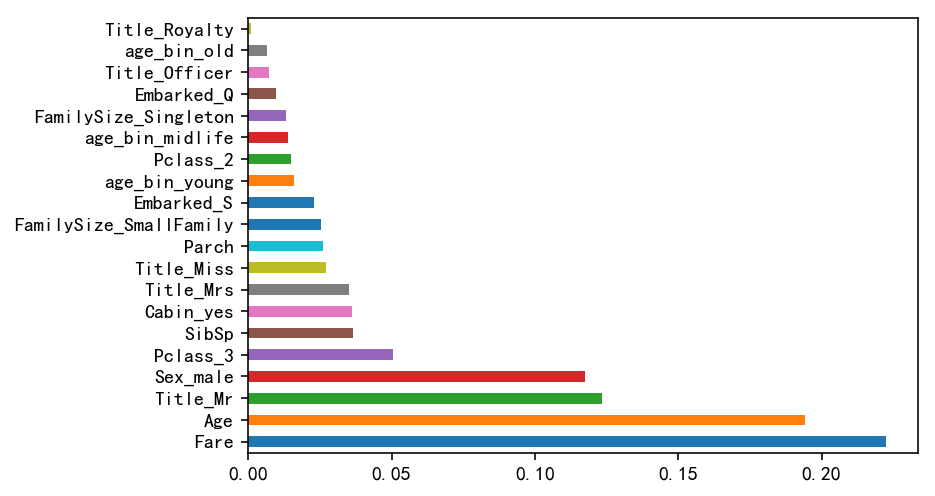

In [74]:
feature_importances.plot(kind='barh')
plt.show()

+ 使用 `SelectFromModel` 提供的方法得到特征的重要性。

传入这个类的模型，必须要有 `feature_importances_` 这个属性。

In [76]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rfc, prefit=True)
train_reduced = sfm.transform(X_train)

In [77]:
train_reduced.shape

(891, 5)

In [78]:
train_reduced

array([[22.        ,  7.25      ,  1.        ,  1.        ,  1.        ],
       [38.        , 71.2833    ,  0.        ,  0.        ,  0.        ],
       [26.        ,  7.925     ,  0.        ,  1.        ,  0.        ],
       ...,
       [17.36087379, 23.45      ,  0.        ,  1.        ,  0.        ],
       [26.        , 30.        ,  1.        ,  0.        ,  1.        ],
       [32.        ,  7.75      ,  1.        ,  1.        ,  1.        ]])

最后只剩下 5 个特征了。

### 网格搜索最佳超参数

In [79]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# 网格搜索开关
run_gs = True

if run_gs:
    parameter_grid = {
        'max_depth': [4, 6, 8],
        'n_estimators': [50, 10],
        'max_features': ['sqrt', 'auto', 'log2'],
        'min_samples_split': [2, 3, 10],
        'min_samples_leaf': [1, 3, 10],
        'bootstrap': [True, False],
    }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(
        forest,
        scoring='accuracy',
        param_grid=parameter_grid,
        cv=cross_validation,
        verbose=1)

    grid_search.fit(train_reduced, y)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

else:
    parameters = {
        'bootstrap': False,
        'min_samples_leaf': 3,
        'n_estimators': 50,
        'min_samples_split': 10,
        'max_features': 'sqrt',
        'max_depth': 6
    }

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score: 0.8406285072951739
Best parameters: {'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
CPU times: user 51.8 s, sys: 86.6 ms, total: 51.9 s
Wall time: 51.9 s


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:   51.9s finished


In [80]:
parameters

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [81]:
model = RandomForestClassifier(**parameters)
model.fit(X_train, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [82]:
y_pred = model.predict(X_test)

In [83]:
res = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_pred})
res.to_csv('../output/gridsearch_rf_2019_05_27.csv', index=False)

![随机森林+网格搜索的提交结果](https://upload-images.jianshu.io/upload_images/414598-2136ff63ba3dc0a7.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

### XGBoost

In [84]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(X_train, y)

In [88]:
y_pred_xgb = model.predict(X_test)
res = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_pred_xgb})
res.to_csv('../output/xgbc_no_tuning_2019_05_27.csv', index=False)

![使用 XGBoost 未调参也得到了同样的准确率](https://upload-images.jianshu.io/upload_images/414598-564dc347fec87f9b.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)